In [1]:
# Create character tuple list
import csv
import os

characters = []

with open("HP_characters.csv", "r", encoding="utf8") as sent_file:
    csv = csv.reader(sent_file, delimiter=",")
    for row in csv:
        name = row[0].replace(' ', '_')
        parentage = row[1]
        house = row[2]
        occupation = row[3]
        characters.append((name, parentage, house, occupation))

In [2]:
# Confirm that we have a file for each character in our list
unzipped = list(list(zip(*characters))[0])
names = []

for file in os.listdir("characters"):
    names.append(file[:-4])

# The difference between the sets is the empty set
print(set(unzipped) - set(names))

set()


In [5]:
import os
import re
import networkx as nx

# Init graph
G = nx.DiGraph()

# Insert nodes
for character in characters:
    G.add_node(character[0], parentage=character[1], house=character[2], occupation=[3])
    
for file in os.listdir("characters"):
    orig_character = file[:-4]
    
    link_list = []
    fileopener = open("characters/" + file, 'r')
    text = fileopener.read()    
    links = re.findall(r'[[]{2}.*?[]]{2}', text)
        
    for link in links:
        character = link.replace("[", "").replace("]", "").replace(" ", "_")
        character = character.partition("|")[0]
        link_list.append(character)
    link_list = [*set(link_list)]
    
    for character in link_list:
        filename = character + ".txt"
        if os.path.isfile("characters/" + filename) or os.path.isfile("characters/" + filename):
            G.add_edge(orig_character, character)

print("Number of nodes: " + str(G.number_of_nodes()))
print("Number of edges: " + str(G.number_of_edges()))

Number of nodes: 339
Number of edges: 6193


sum in_degrees = 6193
sum out_degrees = 6193


Text(0.5, 1.0, 'In- and out-degrees')

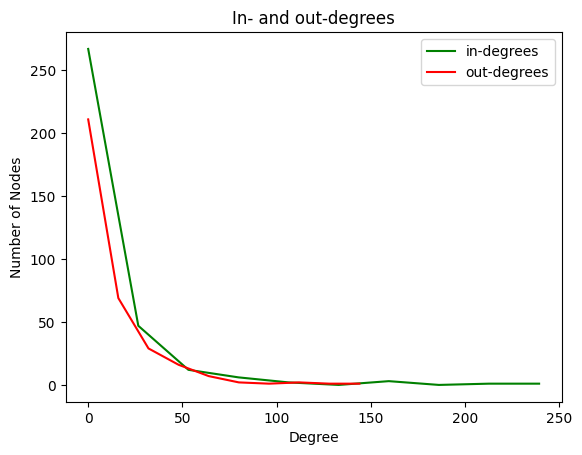

In [16]:
import numpy as np
import matplotlib.pyplot as plt

in_degrees = [i for (c, i) in G.in_degree]
out_degrees = [o for (c, o) in G.out_degree]

print(f"sum in_degrees = {sum(in_degrees)}")
print(f"sum out_degrees = {sum(out_degrees)}")

in_counts, in_bins = np.histogram(in_degrees)
out_counts, out_bins = np.histogram(out_degrees)

plt.plot(in_bins[:-1], in_counts, color = 'green', label='in-degrees')
plt.plot(out_bins[:-1], out_counts, color = 'red', label = 'out-degrees')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('In- and out-degrees')